# 高德地图API


>  [API官网概述](https://lbs.amap.com/api/webservice/summary/)


In [25]:
key='dfc2f1b854462bf8ef8d64578443ebe4'

## 地理编码&逆地理编码

> 地理编码/逆地理编码 API 是通过 HTTP/HTTPS 协议访问远程服务的接口，提供结构化地址与经纬度之间的相互转化的能力。

<b>*思考*</b> 

此功能的实现通过请求时提供具体的地点名/坐标数据来返回对应的“地理编码”/相关信息。其后应该不具有机器学习/人工智能，应该是通过访问资料齐全的数据库的内容来提供请求的反馈。

In [2]:
import requests 
import pandas as pd

地理编码请求URL = 'https://restapi.amap.com/v3/geocode/geo?parameters'
address='中山大学'
city='广州市'

def 获取地理编码():
    get_geocode={
        'key':key,
        'address':address,
        'city':city
        }
    geo_response = requests.get(地理编码请求URL,get_geocode).json()
    return(geo_response)

地理编码=获取地理编码()
print('地理编码',地理编码)

def 逆地理编码数据():
    逆地理编码请求URL='https://restapi.amap.com/v3/geocode/regeo?parameters'
    location=地理编码['geocodes'][0]['location']   # 使用获取地理编码中的坐标数据
#     location
    get_NIgeocode={
        'key':key,
        'city':city,
        'location':location,
        'extensions':'all'
        }
    逆地理_response = requests.get(逆地理编码请求URL,get_NIgeocode).json()
    return(逆地理_response['regeocode'])

逆地理编码=逆地理编码数据()
print('逆地理编码',逆地理编码)

地理编码 {'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省广州市海珠区中山大学', 'country': '中国', 'province': '广东省', 'citycode': '020', 'city': '广州市', 'district': '海珠区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440105', 'street': [], 'number': [], 'location': '113.291103,23.092973', 'level': '兴趣点'}]}
逆地理编码 {'roads': [{'id': '020F49F01104310230', 'location': '113.291,23.0929', 'direction': '西', 'name': '园西路', 'distance': '31.0465'}, {'id': '020F49F0110431139', 'location': '113.291,23.0927', 'direction': '东北', 'name': '新港西路', 'distance': '38.3103'}, {'id': '020F49F01104321391', 'location': '113.291,23.0932', 'direction': '西南', 'name': '园南路', 'distance': '42.4368'}], 'roadinters': [{'second_name': '园南路', 'first_id': '020F49F01104310230', 'second_id': '020F49F01104321391', 'location': '113.2914569,23.09317222', 'distance': '42.4368', 'first_name': '园西路', 'direction': '西南'}], 'formatte

### 通过逆地理编码获取周边信息，并生成表格

In [3]:
逆地理附近表格=pd.json_normalize(逆地理编码['pois'])
逆地理附近表格[['direction','businessarea','address','name','tel','type','distance']].head() # 预览前五项

,direction,businessarea,address,name,tel,type,distance
0,北,新港,新港西路135号,中山大学附属中学,020-84112518;020-84113971,科教文化服务;学校;中学,92.4709
1,西北,新港,新港西路135号中山大学国家大学科技园B座13层,中国大学生创业园海珠园区,[],商务住宅;产业园区;产业园区,9.51348
2,东,新港,新港西路135号中大科技综合楼B座1层,上海浦东发展银行(中大支行),020-84115789;020-84115778,金融保险服务;银行;上海浦东发展银行,2.88983
3,东,新港,新港西路135号中大科技综合楼A座102室,中国银行(广州中山大学支行),020-84113688;020-84113768,金融保险服务;银行;中国银行,88.6254
4,东,新港,新港西路135号大院中大蒲园区634号首层,中国建设银行(中山大学支行),020-34049809;020-34049821,金融保险服务;银行;中国建设银行,96.2859


### 通过输入粗略位置获取坐标，逆地理编码返回详细位置信息

In [4]:
当前详细位置=逆地理编码['formatted_address']
当前详细位置

'广东省广州市海珠区新港街道上海浦东发展银行(中大支行)中山大学广州校区南校园'

### 通过输入粗略位置获取坐标，逆地理编码返回当前位置的行政层级信息

In [5]:
当前详细位置分级表格=pd.json_normalize(逆地理编码['addressComponent'])
当前详细位置分级表格

,city,province,adcode,district,towncode,country,township,businessAreas,citycode,streetNumber.number,streetNumber.location,streetNumber.direction,streetNumber.distance,streetNumber.street,building.name,building.type,neighborhood.name,neighborhood.type
0,广州市,广东省,440105,海珠区,440105002000,中国,新港街道,"[{'location': '113.31655,23.094556', 'name': '...",020,95号,"113.291273,23.0926881",东南,36.1493,新港西路,[],[],[],[]


## 路径规划

> 路径规划API是一套以HTTP形式提供的步行、公交、驾车查询及行驶距离计算接口，返回查询数据，用于实现路径规划功能的开发。 
由于道路/数据/算法的变更，很可能存在间隔一段时间后请求相同起终点的经纬度返回不同结果。

<b>*思考*</b>

在路径规划API中，其后应该是用到了机器学习/人工智能的。例如：通过大量的数据请求，机器可以知道道路的拥挤程度，进而推荐相对合适的规划道路。步行路线规划也好，驾车路线规划也罢，推荐算法的改进也是需要数据的支持，这里面少不了机器的学习过程以及人工智能的加持。

### 步行路径规划

In [6]:
import requests 
import pandas as pd
request_url = "https://restapi.amap.com/v3/geocode/geo?parameters"

# 输入起始点名称
start_address = '中山大学'
start_city='广州市'

end_address = '天汇广场'
end_city='广州市'


def 获取起点坐标():
    start_parameters={'key':key,
               'address':start_address,
                'output':'JSON',
                'city':start_city
               }
    start_response = requests.get(request_url,start_parameters)
    start_point_all=start_response.json()
    start_point=start_point_all['geocodes'][0]['location']
    return(start_point)
start_point=获取起点坐标()
# print("起始坐标：",start_point)

def 获取终点坐标():
    end_parameters={'key':key,
               'address':end_address,
                'output':'JSON',
               }
    end_response = requests.get(request_url,end_parameters)
    end_point_all=end_response.json()
    end_point=end_point_all['geocodes'][0]['location']
    return(end_point)
end_point=获取终点坐标()
# print("终点坐标:",end_point)


def 路线规划():
    road_request_url='https://restapi.amap.com/v3/direction/walking?parameters'  # 步行导航规划
    road_parameters={'key':key,
                               'origin':start_point,
                               'destination':end_point,
                              "city":"广州市"
                                }
    road_response = requests.get(road_request_url,road_parameters)
    步行总数据=road_response.json()
    return(步行总数据)

步行总数据=路线规划()
# print(步行总数据)

步行详细=步行总数据['route']['paths'][0]['steps']
# print(步行详细)

步行描述 = [ i['instruction'] for i in 步行详细] #推导式取列表中['instruction']内容为单纯的步行描述。
步行描述

步行描述表格=pd.json_normalize(步行详细)
步行描述表格.head() # 预览表格

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向西步行66米左转,西,[],66,53,"113.291089,23.092912;113.290451,23.093008",左转,[],0
1,向南步行28米右转,南,[],28,22,"113.290447,23.093008;113.290417,23.092899;113....",右转,[],0
2,沿新港西路向西步行573米,西,新港西路,573,458,"113.290382,23.09276;113.289323,23.092943;113.2...",[],[],0
3,沿东晓路辅路向西北步行112米向右前方行走,西北,东晓路辅路,112,90,"113.284835,23.093754;113.284579,23.093828;113....",向右前方行走,[],0
4,沿东晓路辅路向北步行420米左转,北,东晓路辅路,420,336,"113.283919,23.094297;113.283863,23.094488;113....",左转,[],0


### 公交路线规划

In [7]:
def 公交路线规划(key):
    bus_request_url='https://restapi.amap.com/v3/direction/transit/integrated?parameters'     # 公交导航规划

    bus_parameters={'key':key,
                 'origin':start_point,
                 'destination':end_point,
                 "city":"广州市"
           }

    公交返回数据 = requests.get(bus_request_url,bus_parameters)
    return(公交返回数据)

公交总数据=公交路线规划(key).json()
公交总数据

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '5',
 'route': {'origin': '113.291103,23.092973',
  'destination': '113.252571,23.130262',
  'distance': '7370',
  'taxi_cost': '22.662',
  'transits': [{'cost': '3.0',
    'duration': '1874',
    'nightflag': '0',
    'walking_distance': '1227',
    'distance': '7920',
    'missed': '0',
    'segments': [{'taxi': [],
      'walking': {'origin': '113.291092,23.092913',
       'destination': '113.292862,23.092127',
       'distance': '351',
       'duration': '300',
       'steps': [{'instruction': '步行30米右转',
         'road': [],
         'distance': '30',
         'duration': [],
         'polyline': '113.291092,23.092913;113.291389,23.092873',
         'action': '右转',
         'assistant_action': []},
        {'instruction': '沿园西路步行31米左转',
         'road': '园西路',
         'distance': '31',
         'duration': [],
         'polyline': '113.291389,23.092869;113.291313,23.092590',
         'action': '左转',
         'assistant

In [8]:
公交最快捷方式=公交总数据["route"]["transits"][0]["segments"]    # ‘segments’前的序列为{0：最快捷模式;1：最经济模式;2：最少换乘模式;3：最少步行模式;5：不乘地铁模式}
# print(len(公交最快捷方式))  # 查看路线长度
# print(公交最快捷方式)

公交处理 = [ i["bus"]["buslines"][0] for i in 公交最快捷方式[:len(公交最快捷方式)-1]]
# 公交处理

公交处理表格 = pd.json_normalize(公交处理)
公交处理表格[['name','type','via_stops','arrival_stop.name']]

,name,type,via_stops,arrival_stop.name
0,地铁8号线(万胜围--文化公园),地铁线路,"[{'name': '晓港', 'id': '440100023048010', 'loca...",昌岗
1,地铁2号线(广州南站--嘉禾望岗),地铁线路,"[{'name': '江南西', 'id': '440100023308011', 'loc...",公园前
2,地铁1号线(广州东站--西塱),地铁线路,[],西门口


## 行政区域查询

<b>*思考*</b>

此api应该单纯是请求访问结构化的数据库内来返回对应的值，我们需要提供想要查询的地区以及可选想看区域的详细程度（分级），不具备机器学习/人工智能的相关功能。

In [9]:
def 行政区域查询():
    request_url = "https://restapi.amap.com/v3/config/district?parameters"
    params = {
        "key":key,
        "keywords":"广州市",   # 可填
        "output":"json",
        "subdistrict":2  # 可选返回层级，2到县级
        }
    查询数据 = requests.get(request_url,params=params)
    return(查询数据)
区域 = 行政区域查询().json()
区域

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'suggestion': {'keywords': [], 'cities': []},
 'districts': [{'citycode': '020',
   'adcode': '440100',
   'name': '广州市',
   'center': '113.280637,23.125178',
   'level': 'city',
   'districts': [{'citycode': '020',
     'adcode': '440117',
     'name': '从化区',
     'center': '113.587386,23.545283',
     'level': 'district',
     'districts': [{'citycode': '020',
       'adcode': '440117',
       'name': '江埔街道',
       'center': '113.583,23.5107',
       'level': 'street',
       'districts': []},
      {'citycode': '020',
       'adcode': '440117',
       'name': '城郊街道',
       'center': '113.519,23.6542',
       'level': 'street',
       'districts': []},
      {'citycode': '020',
       'adcode': '440117',
       'name': '街口街道',
       'center': '113.581,23.5096',
       'level': 'street',
       'districts': []},
      {'citycode': '020',
       'adcode': '440117',
       'name': '吕田镇',
       'center': '113.853,23

## POI

<b>*思考*</b>

此api通过请求数据库内的信息来返回用户请求的关键词搜查/城市地区来返回相关内容，不含ML.AI的功能。

### POI查询

In [10]:
def POI查询():
    url = "https://restapi.amap.com/v3/place/text?parameters"
    params = {
        "key":key,
        "keywords":"牛肉", # 搜查关键词
        "output":"json",
        "city":"潮安区",
        "offset":77,  # 数量
        }
    POI数据 = requests.get(url,params=params)
    return(POI数据)

POI返回 = POI查询().json()
POI返回表格 = pd.json_normalize(POI返回['pois'])
POI返回表格[['name','address','tel','adname']] # .to_excel("表格.xlsx")

,name,address,tel,adname
0,牛肉火锅,[],[],潮安区
1,彬兴牛肉,彩塘镇金华书店玉林商务公寓附近,[],潮安区
2,牛肉粿条,浮洋镇车头街,[],潮安区
3,牛肉火锅,枫溪镇枫溪区瓷兴路雄英大厦一楼,0768-2998850;13715733251,潮安区
4,香牛肉,庵埠镇梅溪护堤路与东梅路交界处东梅路1号,0768-5912602,潮安区
5,龙湖牛肉店,龙湖镇龙鹳路与府前街交叉口,18023922678,潮安区
6,新丰牛肉店,龙华路与华丰路交界处,15812688989,潮安区
7,德兴牛肉火锅,龙湖镇银湖村299乡道,0768-6991339;15814930118,潮安区
8,凤凰牛肉火锅,334省道东50米,13553705589,潮安区
9,老乌牛肉,[],[],潮安区


### POI周边搜索

In [11]:
def POI周边():
    url = "https://restapi.amap.com/v3/place/around?parameters "
    params = {
        "key":key,
        "location":start_point,
        "keywords":"餐饮", # 搜查关键词
        "radius":"5000", # 搜查半径
        "output":"json",
        "city":"广州",
        }
    POI周边数据 = requests.get(url,params=params)
    return(POI周边数据)

POI周边返回 = POI周边().json()
POI周边返回
POI周边返回表格 = pd.json_normalize(POI周边返回['pois'])
POI周边返回表格 # .to_excel("表格.xlsx")

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,...,cityname,adname,importance,shopid,shopinfo,poiweight,photos,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B00141QZGP,[],[],肯德基(中大科技园店),餐饮服务;快餐厅;肯德基,050301,diner,新港西路135号中山大学南校区蒲园区628号中大科技综合B座2层,"113.291019,23.092989",020-84115646;4006630666;4008823823,...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,29.00,0
1,B00141OK3N,B00140U8SD,202,必胜客(中大科技园店),餐饮服务;快餐厅;必胜客,050303,diner,新港西路135号中山大学(南校区)蒲园区628号中大科技综合楼B座1-2层,"113.290716,23.093063",020-84115791,...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,56.00,0
2,B0FFKSAI7A,[],[],炜隆香,餐饮服务;中餐厅;广东菜(粤菜),050103,diner,新港西路82号广州交易所集团内新港西路82号广州交易所集团,"113.291148,23.092362",[],...,广州市,海珠区,[],[],0,[],[],[],[],0
3,B0FFKTPSPG,[],[],筑地寿司,餐饮服务;外国餐厅;外国餐厅,050200,diner,新港西路82号百佳超市4楼,"113.291299,23.092300",[],...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,[],0
4,B0FFJ8SYL6,[],[],潮汕头家牛肉食坊,餐饮服务;中餐厅;中餐厅,050100,diner,新港西路82号GL106(星巴克旁),"113.291078,23.092244",020-89999569;18665602833,...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,90.00,0
5,B00140SXZF,[],[],都城快餐(新港店),餐饮服务;快餐厅;快餐厅,050300,diner,"新港西路89号1楼(中山大学西门附近,百佳对面)","113.290276,23.092937",020-84188766;020-84186667,...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,27.00,0
6,B0FFJ963UV,[],[],汤大人老妈馄饨(新港西店),餐饮服务;中餐厅;中餐厅,050100,diner,新港街道新港西路72号富景花园,"113.290395,23.092487",[],...,广州市,海珠区,[],[],1,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,27.00,0
7,B0FFK2LZKW,[],[],饺大叔(中大店),餐饮服务;中餐厅;中餐厅,050100,diner,新港西路82号广州轻纺交易园A1001铺,"113.291343,23.092149",13430260266,...,广州市,海珠区,[],[],0,[],[],[],[],0
8,B0FFIQURH4,[],[],汉堡王(新港82广场店),餐饮服务;快餐厅;快餐厅,050300,diner,新港西路82号广州轻纺交易员区正门右侧A1003-A1006号商铺,"113.291417,23.092145",020-89189137,...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,27.00,0
9,B0FFF5URO9,[],[],中国清真兰州拉面(新港西店),餐饮服务;中餐厅;清真菜馆,050121,diner,新港西路84号(近地铁中大站),"113.291853,23.092183",13168310665;18090742888,...,广州市,海珠区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.0,21.00,0


## IP定位

<b>*思考*</b>

此api没用ML.AI功能。通过ip地址查询该ip所在的地区。

In [12]:
# 获取本机ip
import socket
import random
def get_host_ip():
  try:
    s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    s.connect(('8.8.8.8', 80))
    ip = s.getsockname()[0]
  finally:
    s.close()
  return ip
ip=get_host_ip()



# 生成随机ip
def 随机ip():
    m=random.randint(0,255)
    n=random.randint(0,255)
    x=random.randint(0,255)
    y=random.randint(0,255)
    randomIP=str(m)+'.'+str(n)+'.'+str(x)+'.'+str(y)
    return(randomIP)
随机ip=随机ip()
print(随机ip)

# 请求api
def 查IP():
    url = "https://restapi.amap.com/v3/ip?parameters"
    params = {
        "key":key,
        "ip":随机ip
        }
    查IP结果 = requests.get(url,params=params)
    return(查IP结果)

IP返回=查IP().json()
IP返回

122.244.168.242


{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '浙江省',
 'city': '宁波市',
 'adcode': '330200',
 'rectangle': '121.3173974,29.67340916;121.8125439,30.06811904'}

## 静态地图

<b>*思考*</b>

应该带有机器学习的功能，机器通过学习当前周边的道路中的车辆访问数量来反馈当前道路是否拥堵/空旷。

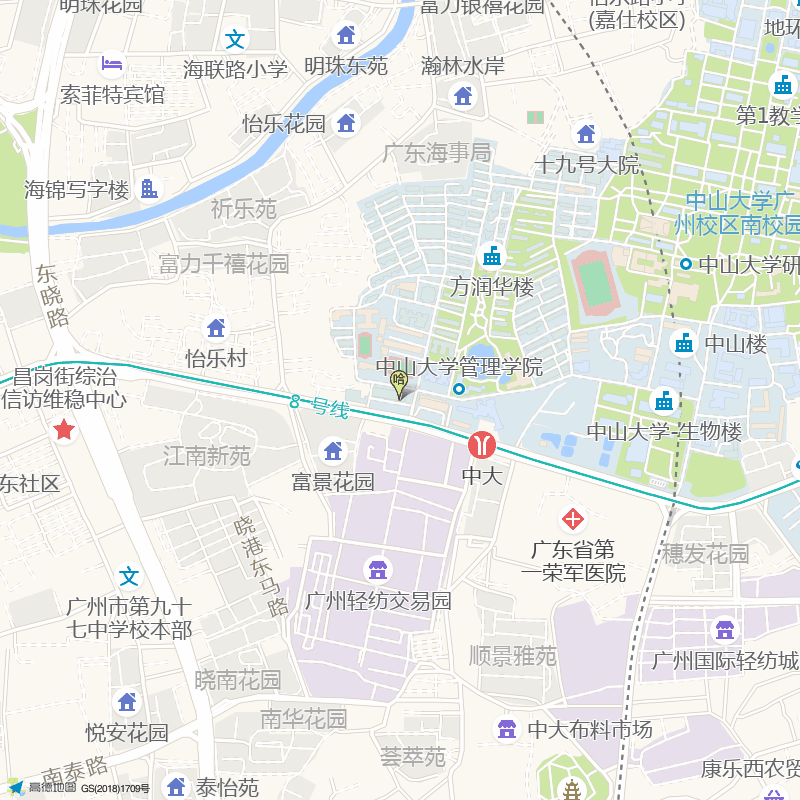

In [19]:
from PIL import Image
from io import BytesIO

def 静态地图():
    markers='mid,0xFFFF00,哈:'+start_point+';'+end_point
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':start_point,
        'zoom':'14',  # 放大的倍数。数字越大，到达展示准确度越高。
        'scale':'2', # 1为小图，2为大图
        'traffic':'0', #0为不显示交通，1为显示
        'output':'json',
        "markers":markers
        }
    静态地图数据 = requests.get(url,params=params)
    return(静态地图数据)
# response.content
生成图 = Image.open(BytesIO(静态地图().content))
生成图

## 坐标转换

<b>*思考*</b>

此api接口能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标。应该是有机器学习的数值转换的算法。

In [20]:
def 坐标转换():
    url = "https://restapi.amap.com/v3/assistant/coordinate/convert?parameters"
    params = {
        "key":key,
        "locations":"118.961365,32.110012|118.798150,32.046546",
        "coordsys":"gps",
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

坐标转换()

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '118.966488444011,32.10785780165;118.803330349393,32.044471571181'}

## 批量请求

<b>*思考*</b>

没有什么好说的，就是将多次请求集合在一起。这个api接口是套娃接口，去访问其他接口的。

In [14]:
import json
def 批量请求():
    url='https://restapi.amap.com/v3/batch?key='+key

    params= {
        "ops": [
            {
                "url": "/v3/place/around?offset=10&page=1&key=dfc2f1b854462bf8ef8d64578443ebe4&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            },
            {
                "url": "/v3/place/around?offset=10&page=1&key=dfc2f1b854462bf8ef8d64578443ebe4&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            }
        ]
            }

    params=json.dumps(params)   # 转化为json格式

    # ? requests.post 查看post请求参数可以知道，post请求使用json格式进行数据传递

    请求返回 = requests.post(url=url,data=params)
    return(请求返回)

批量请求().json()

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

## 天气查询

<b>*思考*</b>

背后：搜索算法、数值分析算法。通过对应的编码对应到城市，去访问对应的数值。

In [15]:
def 天气查询():
    url='https://restapi.amap.com/v3/weather/weatherInfo?parameters'

    # 将官网城市编码文档储存为字典
    df=pd.read_excel('AMap_adcode_citycode_2020_4_10.xlsx')
    # display(df)
    编码字典=df.reset_index().set_index('中文名')['adcode'].to_dict()
    编码字典

    city=input('输入城市/地区名称：')

    params={
        'key':key,
        'city':编码字典[city],
        'extensions':'all',  #base/all:base:返回实况天气,all:返回预报天气
        'output':'json'
        }

    response = requests.get(url,params=params)
    return(response)

天气数据=天气查询().json()
天气表格=pd.json_normalize(天气数据['forecasts'][0]['casts'])
天气表格

输入城市/地区名称：广州市


,date,week,dayweather,nightweather,daytemp,nighttemp,daywind,nightwind,daypower,nightpower
0,2020-04-23,4,中雨,中雨,18,14,无风向,无风向,≤3,≤3
1,2020-04-24,5,中雨,阴,18,15,无风向,无风向,≤3,≤3
2,2020-04-25,6,多云,多云,21,16,无风向,无风向,≤3,≤3
3,2020-04-26,7,阵雨,多云,22,17,无风向,无风向,≤3,≤3


## 输入提示

<b>*思考*</b>

机器学习中推荐算法、检索算法吧。用户通过输入关键词进而返回相关内容。有点类似POI。

In [24]:
def 输入提示(keywords):
    url = "https://restapi.amap.com/v3/assistant/inputtips?parameters"
    params = {
        "key":key,
        "keywords":keywords,
        "types":"050301",
        "location":start_point,
        "city":"广州市",
        "citylimit":True,
        "datatype":"all",
        "sig":None,
        "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

input_for_search = pd.json_normalize(输入提示(keywords=input("输入关键字:"))["tips"])
input_for_search[["address","district","name","location"]]

输入关键字:地铁


,address,district,name,location
0,3号线;5号线,广东省广州市天河区,珠江新城(地铁站),"113.321206,23.119293"
1,[],广东省广州市,地铁3号线,NaN
2,(在建)12号线;4号线,广东省广州市番禺区,大学城北(地铁站),"113.385639,23.058091"
3,(在建)11号线内环;(在建)11号线外环;(在建)14号线二期;2号线;5号线,广东省广州市越秀区,广州火车站(地铁站),"113.256603,23.148143"
4,(在建)14号线二期;14号线;2号线;3号线北延段,广东省广州市白云区,嘉禾望岗(地铁站),"113.289243,23.237460"
5,3号线,广东省广州市番禺区,市桥(地铁站),"113.361726,22.949743"
6,1号线;3号线;3号线北延段,广东省广州市天河区,体育西路(地铁站),"113.321503,23.131138"
7,(在建)8号线北延线;6号线;8号线,广东省广州市荔湾区,文化公园(地铁站),"113.248976,23.109186"


## 交通态势

<b>*思考*</b>

根据用户输入的内容能够返回希望查询的交通态势情况，机器学习动态分析算法。

In [28]:
def 交通():
    url = "https://restapi.amap.com/v3/traffic/status/circle?parameters"
    params = {
     "key":key,
     "location":start_point,
     "radius":"5000",
     "level":"5",
     "extensions":"all",
     "sig":None,
     "output":"json"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

df_traffic = pd.json_normalize(交通()["trafficinfo"])
df_traffic


,description,roads,evaluation.expedite,evaluation.congested,evaluation.blocked,evaluation.unknown,evaluation.status,evaluation.description
0,新凤凰直街：自西向东缓慢，反向拥堵，从怡趣街到怡凤街严重拥堵；瑞康路：从新滘西路到康乐西约新...,"[{'name': '新凤凰直街', 'status': '3', 'direction':...",71.43%,19.64%,3.57%,5.36%,2,轻度拥堵


## 地理围栏

<b>*思考*</b>

地理围栏相当于用一个虚拟的栅栏围出一个虚拟的地理边界。应用还是比较广泛，像共享汽车、共享单车的限定边界；无人机的限飞区域等。用到的算法或许有计算几何的算法，机器学习里动态规划算法。

### 创建围栏

In [16]:
url='https://restapi.amap.com/v4/geofence/meta?key='+key
params={
    "name": "猪圈",
    "center": '113.290447,23.093008',
    "radius": "1000",
    "enable": "true",
    "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
    "time": "00:00,11:59;13:00,20:59",
    "alert_condition": "enter;leave"
    }
response=requests.post(url,json=params)
response.json()

{'data': {'message': '新增围栏已存在', 'status': '106'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 查询围栏

In [17]:
params={
    "key":key,
    "id": "0",
    }
response=requests.get(url,params=params)
response.json()

{'data': {'page_no': 1,
  'page_size': 20,
  'rs_list': [{'adcode': '0',
    'alert_condition': 'enter;leave',
    'center': '113.291103,23.092973',
    'create_time': '2020-04-22 11:17:07',
    'enable': True,
    'fixed_date': '',
    'gid': '136f3fc4-526b-47c7-85fc-46cdb83efe84',
    'id': '0',
    'key': 'dfc2f1b854462bf8ef8d64578443ebe4',
    'name': '测试围栏名称',
    'points': '',
    'radius': 1000.0,
    'repeat': 'Mon,Tues,Wed,Thur,Fri,Sat,Sun',
    'time': '00:00,11:59;13:00,20:59',
    'valid_time': '2020-07-21'},
   {'adcode': '0',
    'alert_condition': 'enter;leave',
    'center': '113.252571,23.130262',
    'create_time': '2020-04-22 11:19:25',
    'enable': True,
    'fixed_date': '',
    'gid': '7cf9598a-3110-4729-9ec0-2cbcc653d641',
    'id': '0',
    'key': 'dfc2f1b854462bf8ef8d64578443ebe4',
    'name': '后花园',
    'points': '',
    'radius': 1000.0,
    'repeat': 'Mon,Tues,Wed,Thur,Fri,Sat,Sun',
    'time': '00:00,11:59;13:00,20:59',
    'valid_time': '2020-07-21'},
   

## 轨迹纠偏

<b>*思考*</b>

在大多数设备上定位依靠的是GPS/WLAN定位，这些定位方式很容易受地形、天气、磁场的影响。轨迹纠偏应该是有用到机器学习/人工智能的，该功能主要是让计算机来识别并精确匹配到道路上。不好的地方也有例如在轨迹上的导航同一道路上到底是道路的哪一侧。

In [18]:
url='https://restapi.amap.com/v4/grasproad/driving?key='+key

body=[{
"x": 116.449429,
"y": 40.014844,
"sp": 4,
"ag": 110,
"tm": 1478831753
},
    {
"x": 116.449639,
"y": 40.014776,
"sp": 3,
"ag": 110,
"tm": 23
}, 
    {
"x": 116.449859,
"y": 40.014716,
"sp": 3,
"ag": 111,
"tm": 33
}, 
    {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 31
}, 
    {
"x": 116.450273,
"y": 40.014598,
"sp": 3,
"ag": 111,
"tm": 20
}]

response=requests.post(url,data=json.dumps(body))
response.json()

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

# 尝试设计应用

-- 想用API设计的应用-- 



*景点分享类APP*

通过用户分享以及相关资料将坐标和对应的景点相关（食宿、交通、游玩）存储在数据库中，为用户推荐所在城市/地区的景点，并且提供天气、交通预测。


*涉及API功能：*
- POI搜索
- 交通态势
- 路线规划
- 天气查询